# denovoCNN - Deep Learning Based <i>De Novo</i> Variant Calling

A deep learning approach to de novo variant calling in next generation sequencing data

In [1]:
import os
import pandas as pd
import numpy as np
import pysam

import matplotlib.pyplot as plt

from denovonet.settings import PRODUCTION_SNP_MODEL_PATH, PRODUCTION_INSERTION_MODEL_PATH, PRODUCTION_DELETION_MODEL_PATH, MINIMAL_COVERAGE
from denovonet.utils import get_variant_location
from denovonet.encoders import VariantClassValue, VariantInheritance
from denovonet.variants import SingleVariant, TrioVariant
from denovonet.local_utils import get_rumc_bam_path
from denovonet.models import evaluate

from keras.models import load_model
from keras import backend as K

def get_variant_class(reference, alternate):
    if len(reference) == 1 and len(alternate) == 1:
        return VariantClassValue.snp
    elif len(reference) > len(alternate):
        return VariantClassValue.deletion
    elif len(reference) < len(alternate):
        return VariantClassValue.insertion
    else:
        if ',' in alternate:
            return VariantClassValue.deletion
        elif ',' in reference:
            return VariantClassValue.insertion
        else:
            raise TypeError('Unknown Variant Class. Reference: {} . Alternate {}'.format(reference, alternate))
            
def parse_variant_from_intersected(row):
    chromosome = str(row[0])
    start = str(int(row[1]))
    end = str(int(row[2]))
    reference = str(row[3])
    alternate = str(row[4])

    return chromosome, start, reference, alternate

def get_end_coordinate(reference, start):
    return str( int(start) + len(reference) - 1 )

TEST_VARIANTS = os.path.join('data','test','test_variants.txt')
test_variants_dataframe = pd.read_csv(TEST_VARIANTS, sep='\t')
test_variants_dataframe = test_variants_dataframe.replace(np.nan, '', regex=True)

print(test_variants_dataframe.head())

print('SNP model',PRODUCTION_SNP_MODEL_PATH)
print('Insertion model',PRODUCTION_INSERTION_MODEL_PATH)
print('Deletion model',PRODUCTION_DELETION_MODEL_PATH)

model_snps = load_model(PRODUCTION_SNP_MODEL_PATH)
model_insertions = load_model(PRODUCTION_INSERTION_MODEL_PATH)
model_deletions = load_model(PRODUCTION_DELETION_MODEL_PATH)

REREFERENCE_GENOME = pysam.FastaFile('hs37d5.fa.gz')

ImportError: No module named 'denovonet.local_utils'

# Evaluate networks

Evaluate network performance and draw ROC plots.<br>
Insertion and deletion networks are compared to SNP network also.

In [6]:
model_insertions_5_path = '/insertions.gray.filtered.notl.25.h5'
model_insertions_7_path = '/insertions.gray.filtered.tl.15.h5'

model_deletions_3_path = '/deletions.gray.filtered.notl.25.h5'
model_deletions_4_path = '/deletions.gray.filtered.tl.15.h5'

model_snps_filtered_30_path = '/snps.gray.filtered.notl.30.h5'
model_snps_filtered_45_path = '/snps.gray.filtered.notl.45.h5'
model_snps_filtered_full_path = '/full.gray.filtered.notl.40.h5'

dataset_insertions = 'insertions_pm3'
dataset_deletions = 'deletions_pm2'
dataset_snps = 'snps_filtered'

IMAGES_FOLDER = 'images2'

Model: Filtered SNP network (30 epochs)
Recommended threshold: 0.9625194221735001
ROC AUC score: 0.9883588624441679
Accuracy: 0.9726533628972653
True positives: 506
False positives: 41
True negatives: 2126
False negative: 33
Sensitivity: 0.9387755102040817
Specificity: 0.981079833871712
F1 score: 0.9318600368324125

Model: Filtered SNP network (45 epochs)
Recommended threshold: 0.8582775890827179
ROC AUC score: 0.9914191879713667
Accuracy: 0.9763488543976349
True positives: 523
False positives: 48
True negatives: 2119
False negative: 16
Sensitivity: 0.9703153988868275
Specificity: 0.9778495616059067
F1 score: 0.9423423423423423

Model: Full network (40 epochs)
Recommended threshold: 0.4415786862373352
ROC AUC score: 0.9907276288876923
Accuracy: 0.9767184035476718
True positives: 532
False positives: 56
True negatives: 2111
False negative: 7
Sensitivity: 0.987012987012987
Specificity: 0.9741578218735579
F1 score: 0.9440993788819876



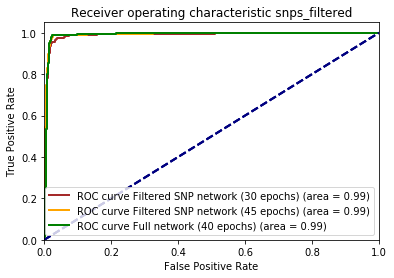

In [9]:
model_snps_filtered_30 = {'model':load_model(model_snps_filtered_30_path),
          'name':'Filtered SNP network (30 epochs)',
           'color':'brown',
          }
model_snps_filtered_45 = {'model':load_model(model_snps_filtered_45_path),
          'name':'Filtered SNP network (45 epochs)',
           'color':'orange',
          }
model_snps_filtered_full = {'model':load_model(model_snps_filtered_full_path),
          'name':'Full network (40 epochs)',
           'color':'green',
          }


models_snps = [model_snps_filtered_30, model_snps_filtered_45, model_snps_filtered_full]

evaluate(models_snps, IMAGES_FOLDER, dataset_snps)

Model: Insertions extracted no TL + 2 artificial trios (25 epochs)
Recommended threshold: 0.9815449565649033
ROC AUC score: 0.9691265060240963
Accuracy: 0.9537366548042705
True positives: 23
False positives: 4
True negatives: 245
False negative: 9
Sensitivity: 0.71875
Specificity: 0.9839357429718876
F1 score: 0.7796610169491525

Model: Insertions extracted TL + 2 artificial trios (15 epochs)
Recommended threshold: 0.510173499584198
ROC AUC score: 0.9860692771084338
Accuracy: 0.9679715302491103
True positives: 29
False positives: 6
True negatives: 243
False negative: 3
Sensitivity: 0.90625
Specificity: 0.9759036144578314
F1 score: 0.8656716417910447

Model: Full network (40 epochs)
Recommended threshold: 0.30634111166000366
ROC AUC score: 0.9727660642570282
Accuracy: 0.9466192170818505
True positives: 29
False positives: 12
True negatives: 237
False negative: 3
Sensitivity: 0.90625
Specificity: 0.9518072289156626
F1 score: 0.7945205479452054



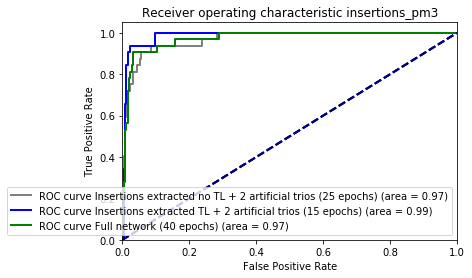

In [7]:

model_insertions_5 = {'model':load_model(model_insertions_5_path),
          'name':'Insertions extracted no TL + 2 artificial trios (25 epochs)',
           'color':'gray',
          }

model_insertions_7 = {'model':load_model(model_insertions_7_path),
          'name':'Insertions extracted TL + 2 artificial trios (15 epochs)',
           'color':'blue',
          }
model_snps_filtered_full = {'model':load_model(model_snps_filtered_full_path),
          'name':'Full network (40 epochs)',
           'color':'green',
          }
models_insertions = [model_insertions_5,  model_insertions_7, model_snps_filtered_full]

evaluate(models_insertions, IMAGES_FOLDER, dataset_insertions)

Model: Deletions - no TL + 2 artificial trio + training (25 epochs)
Recommended threshold: 0.047010600566864014
ROC AUC score: 0.9900130264871907
Accuracy: 0.9603174603174603
True positives: 48
False positives: 14
True negatives: 315
False negative: 1
Sensitivity: 0.9795918367346939
Specificity: 0.9574468085106383
F1 score: 0.8648648648648648

Model: Deletions - TL + 2 artificial trio + training (15 epochs)
Recommended threshold: 0.4875105619430542
ROC AUC score: 0.9906333354010297
Accuracy: 0.9788359788359788
True positives: 47
False positives: 6
True negatives: 323
False negative: 2
Sensitivity: 0.9591836734693877
Specificity: 0.9817629179331308
F1 score: 0.9215686274509803

Model: Full network (40 epochs)
Recommended threshold: 0.4183664917945862
ROC AUC score: 0.9927423857080826
Accuracy: 0.9735449735449735
True positives: 49
False positives: 10
True negatives: 319
False negative: 0
Sensitivity: 1.0
Specificity: 0.9696048632218845
F1 score: 0.9074074074074074



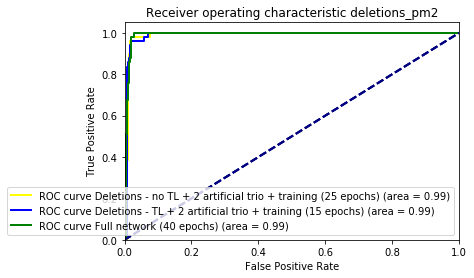

In [8]:

model_deletions_3 = {'model':load_model(model_deletions_3_path),
          'name':'Deletions - no TL + 2 artificial trio + training (25 epochs)',
           'color':'yellow',
          }
model_deletions_4 = {'model':load_model(model_deletions_4_path),
          'name':'Deletions - TL + 2 artificial trio + training (15 epochs)',
           'color':'blue',
          }

models_deletions = [ model_deletions_3, model_deletions_4, model_snps_filtered_full]

evaluate(models_deletions, IMAGES_FOLDER, dataset_deletions)

# Building datasets

## Cohort description

A total 2419 of child-parent trios were enrolled in the study